# 10. Gradient Boosting Machine

Similarly to bagging, boosting is a general technique to create an ensable of any type of base learner:
* base learners are weak learners (e.g. decision trees), therefore have low variance but high bias
* bias reduction is obtained by updating each fit
* it is a sequential improvement
    * current tree uses information from all past trees
    * high performance is obtained by rectifying all past mistakes
    * high risk of overfitting

* although the base learner can be any weak learner. We will use decision trees as weak learners
* the algorithm is stochastic by subsampling in the rows and columns of the data
* the loss function is optimized via gradient descent

### 10.1 Stochastic gradient descent

The selection of the appropriate learning rate is crucial to properly optimize the loss function
* if too big -> likely to overshoot the optimal solution
* if too small -> slow the process to reach the optimal solution

<figure>
<img src="./imgs/learning_rate.png" alt="autoencoder_schema" style="width: 800px;"/>
<figcaption><center>Figure 12.4 from Boehmke & Greenwell <a href="https://bradleyboehmke.github.io/HOML/gbm.html">Hands-onm with machine learning with R</a>.<p></p></center></figcaption>
</figure>

### 10.2 Fitting process

Initialize the model fit with a global average and calculate pseudo-residuals.

Do the following $B$ times:
* fit a tree of a pre-specified depth to the <span style="color:#173F5F">**pseudo-residuals**</span>
* <span style="color:#173F5F">**update**</span> the model fit and pseudo-residuals with <span style="color:#173F5F">**shrunk**</span> version
* shrinkage to slow down version and <span style="color:#173F5F">**prevent**</span> overfitting.

The model after $B$ iteration is the <span style="color:#173F5F">**end product**</span>.

One of the most popular packages in python is ```xgboost```, which has efficient implementation and some other extra features.

The method ```class xgboost.XGBRegressor(*, objective='reg:squarederror', **kwargs)``` presents the following parameters:
* ```n_estimators```: number of gradient boosted trees; this is equivalent to the number of boosting rounds
* ```max_depth```: max. tree depth for base learners
* ```learning_rate```: boosting learning rate
* ```objective```: objective function to be used
* ```tree_method```: which tree method to use, default = ```auto```
* ```reg_alpha```: L1 regularization term on weights
* ```reg_lambda```: L2 regularization term on weights
* ```monotone_constraints```: Constraint of variable monotonicity
* ...

A lot of parameters at our disposal to <span style="color:#173F5F">**tweak**</span> the GBM.

Some have a <span style="color:#173F5F">**big impact**</span> on the performance and should therefore be <span style="color:#173F5F">**properly tuned**</span>:
* ```n_estimators```: depends very much on the use case, it varies between 100 and 10000
* ```max_depth```: low values are preferred for boosting to obtain weak base learners
* ```learning rate```: typically set the lowest possible value that is computationally feasable.

<span style="color:#173F5F">**Rule of thumb**</span>: if ```learning_rate``` goes down, then ```n_estimators``` goes up.

In [64]:
# import relevant libraries
import matplotlib.pyplot as plt
from matplotlib import animation
import xgboost as xgb
import pandas as pd
import numpy as np
import random

In [3]:
# generate synthetic data
x = np.linspace(start=0, stop=2 * np.pi, num=500)
m = 2 * np.sin(x)
y = m + np.random.normal(loc = 0, scale = 1, size = len(x))

**Fitting model1**
* low number of trees
* shallow trees
* very high learning rate

In [4]:
# fitting model1
xgb_model1 = xgb.XGBRegressor(n_estimators = 10, 
                              objective='reg:squarederror',
                              max_depth = 1,
                              learning_rate = 2,
                              monotone_constraints = "(1,-1)")

xgb_model1.fit(x.reshape(-1,1), y.reshape(-1,1))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=2, max_delta_step=0, max_depth=1, min_child_weight=1,
             missing=nan, monotone_constraints='(1,-1)', n_estimators=10,
             n_jobs=16, num_parallel_tree=1, random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [5]:
# predict model1
predict_model1 = xgb_model1.predict(x.reshape(-1,1))

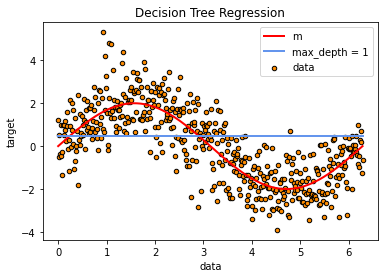

In [6]:
# plot original data, original data + stochastic component, gbm prediction for model1
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data") # plot raw data (including stoch. desturbance)
plt.plot(x, m, color="red", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
plt.plot(x, predict_model1, color="cornflowerblue", label="max_depth = 1", linewidth=2) # depth 1
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

**Fitting model2**
* low number of trees
* shallow trees
* very low learning rate

In [7]:
# fitting model2
xgb_model2 = xgb.XGBRegressor(n_estimators = 10, 
                              objective='reg:squarederror',
                              max_depth = 1,
                              learning_rate = 0.01)
xgb_model2.fit(x.reshape(-1,1), y.reshape(-1,1))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=1,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
# predict model2
predict_model2 = xgb_model2.predict(x.reshape(-1,1))

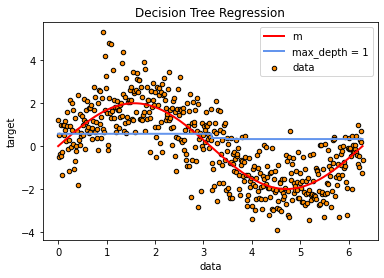

In [10]:
# plot original data, original data + stochastic component, gbm prediction for model2
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data") # plot raw data (including stoch. desturbance)
plt.plot(x, m, color="red", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
plt.plot(x, predict_model2, color="cornflowerblue", label="max_depth = 1", linewidth=2) # depth 1
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

**Fitting model3**
* high number of trees <span style="color:#173F5F">**(careful considerations on overfitting must be done)**</span>
* higher ```max_depth``` parameter than model1 and model2
* very low learning rate

In [62]:
# fitting model3
xgb_model3 = xgb.XGBRegressor(n_estimators = 300, 
                              objective='reg:squarederror',
                              max_depth = 2,
                              learning_rate = 0.01)
xgb_model3.fit(x.reshape(-1,1), y.reshape(-1,1))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [128]:
# generate list that contains prediction per boosting iteration
prediction_per_iteration = [xgb_model3.predict(x.reshape(-1,1), ntree_limit = i) for i in np.arange(1,299,34)]

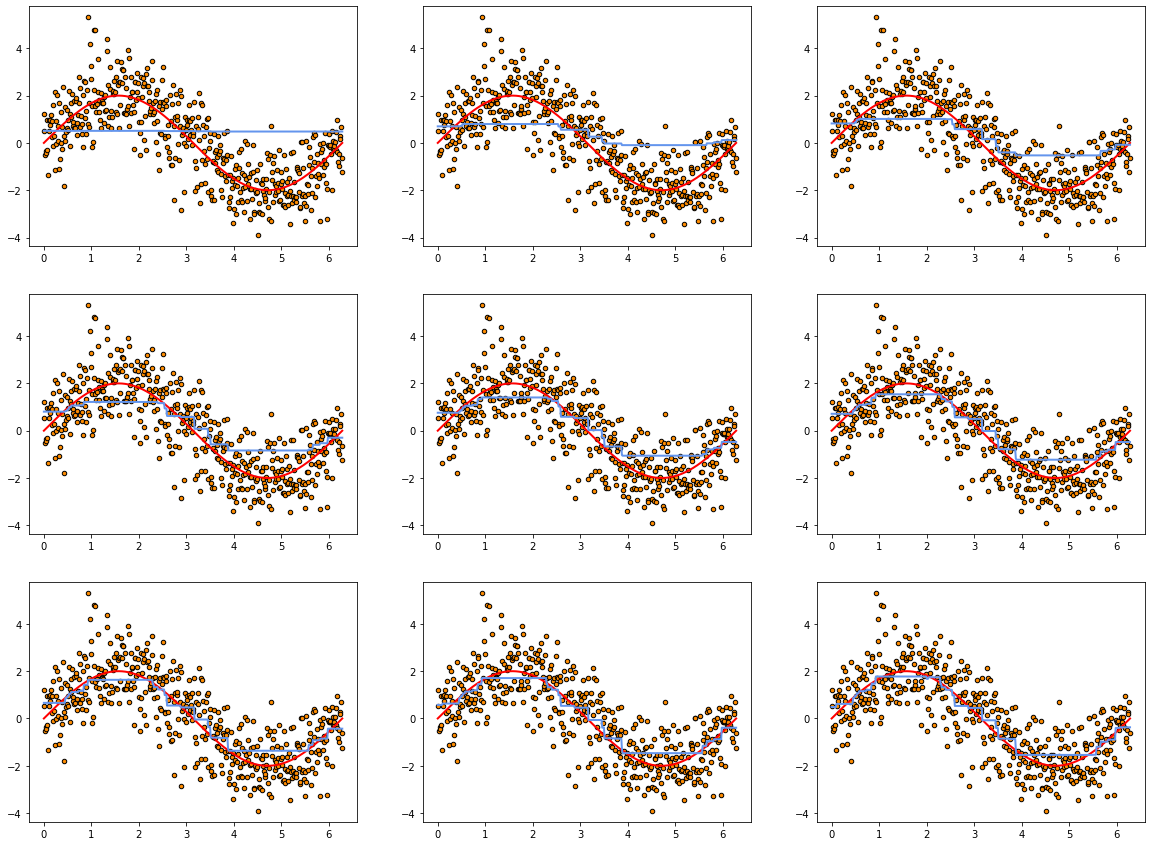

In [139]:
# plot using incremental number of boosts to improve fitting
seg = int(len(prediction_per_iteration)/3)
fig, ax = plt.subplots(nrows=seg, ncols=seg, figsize=(20, 15))
ax = ax.ravel()
for i in range(len(prediction_per_iteration)):
    ax[i].scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data") # plot raw data (including stoch. desturbance)
    ax[i].plot(x, m, color="red", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
    ax[i].plot(x, prediction_per_iteration[i], color="cornflowerblue", label="max_depth = 1", linewidth=2) # depth 1